<a href="https://colab.research.google.com/github/Mustufain/covid_19_analysis/blob/master/corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import random
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from bs4 import BeautifulSoup
from datetime import datetime 
from datetime import date
import requests

In [2]:
def get_past_data():
  url = 'https://raw.githubusercontent.com/Mustufain/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
  past_data = pd.read_csv(url)
  return past_data
confirmed = get_past_data()
dates = list(confirmed.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).columns)
confirmed_df = confirmed.groupby(['Country/Region'])[dates].sum(axis=1).reset_index()

past_data = pd.melt(confirmed_df, id_vars = ['Country/Region'])
past_data = past_data.loc[past_data['Country/Region'].isin(['Pakistan', 'Italy', 'France', 'Spain', 'Iran', 'Germany', 'Korea, South', 'Australia', 'US'])]
past_data['variable'] = past_data['variable'].apply(lambda row: datetime.strptime(row,'%m/%d/%y').date())
past_data['Country/Region'] = past_data['Country/Region'].apply(lambda row: row.upper())
past_data['Country/Region'] = past_data['Country/Region'].apply(lambda row: 'UNITED STATES' if row == 'US' else row) 
past_data['Country/Region'] = past_data['Country/Region'].apply(lambda row: 'S. KOREA' if row == 'KOREA, SOUTH' else row) 


color_codes = []
total_confirmed_cases = list(past_data.loc[past_data['Country/Region'].isin(
    ['PAKISTAN', 'ITALY', 'FRANCE', 'SPAIN', 'IRAN', 'GERMANY', 'S. KOREA', 'AUSTRALIA', 'UNITED STATES'])]['Country/Region'])

for i in range(len(total_confirmed_cases)):
  random_number = random.randint(0,16777215)
  hex_number = str(hex(random_number))  
  hex_number ='#'+ hex_number[2:]
  color_codes.append(hex_number)

colors = dict(zip(
    total_confirmed_cases,
    color_codes
))
print (colors)

past_data.tail()

{'AUSTRALIA': '#16db90', 'FRANCE': '#b2a9be', 'GERMANY': '#ce6faf', 'IRAN': '#3827df', 'ITALY': '#391eae', 'S. KOREA': '#75d608', 'PAKISTAN': '#1d2a7b', 'SPAIN': '#376f12', 'UNITED STATES': '#20fc38'}


,Country/Region,variable,value
9873,ITALY,2020-03-21,53578
9879,S. KOREA,2020-03-21,8799
9912,PAKISTAN,2020-03-21,730
9936,SPAIN,2020-03-21,25374
9949,UNITED STATES,2020-03-21,25489


In [3]:
def get_current_data():
  response = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQuDj0R6K85sdtI8I-Tc7RCx8CnIxKUQue0TCUdrFOKDw9G3JRtGhl64laDd3apApEvIJTdPFJ9fEUL/pubhtml?gid=0&single=true')
  if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    data = []
    table = soup.find_all('tr')[2:]
    for tags in table:
      td = tags.find_all('td')[1:]
      data.append([td[0].text, td[1].text, td[2].text, td[3].text])
      covid_19 = pd.DataFrame(data, columns=['country', 'confirmed', 'death', 'recover'])
    return covid_19
current_data = get_current_data()
current_data['date'] = date.today()
current_data = current_data[['country','date', 'confirmed']]
current_data.columns = list(past_data.columns)
current_data.head()

,Country/Region,variable,value
0,AFGHANISTAN,2020-03-22,40
1,ALBANIA,2020-03-22,89
2,ALGERIA,2020-03-22,201
3,ANGOLA,2020-03-22,2
4,ANTIGUA AND BARBUDA,2020-03-22,1


In [4]:
covid_19 = pd.concat([past_data, current_data])
covid_19 = covid_19.loc[covid_19['Country/Region'].isin(['PAKISTAN', 'ITALY', 'FRANCE', 'SPAIN', 'IRAN', 'GERMANY', 
                                              'S. KOREA', 'AUSTRALIA', 'UNITED STATES'])]
covid_19['value'] = covid_19['value'].astype(int)
covid_19.head()


,Country/Region,variable,value
8,AUSTRALIA,2020-01-22,0
58,FRANCE,2020-01-22,0
62,GERMANY,2020-01-22,0
75,IRAN,2020-01-22,0
79,ITALY,2020-01-22,0


In [0]:
plt.style.use('dark_background')
def draw_barchart(day):
  df = covid_19.loc[covid_19.variable == day.date()].sort_values(by='value', ascending=True)
  ax.clear()
  ax.barh(df['Country/Region'], df['value'], color=[colors[x] for x in df['Country/Region']])
  for i, (value, name) in enumerate(zip(df['value'], df['Country/Region'])):   
      ax.text(value, i,     name,           size=14, weight=600, ha='right', va='bottom')
      ax.text(value, i,     f'{float(value):,.0f}',  size=14, ha='left',  va='center')
      ax.text(1, 0.4, day.date(), transform=ax.transAxes, color='white', size=46, ha='right', weight=800)
      ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
      ax.xaxis.set_ticks_position('top')
      ax.tick_params(axis='x', colors='#777777', labelsize=12)
      ax.set_yticks([])
      ax.margins(0, 0.01)
      ax.grid(which='major', axis='x', linestyle='-')
      ax.set_axisbelow(True)
      ax.text(0, 1.12, 'Confirmed Covid-19 cases',
            transform=ax.transAxes, size=24, weight=600, ha='left')
      ax.text(1, 0, 'by @mustufain', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
      plt.box(False)

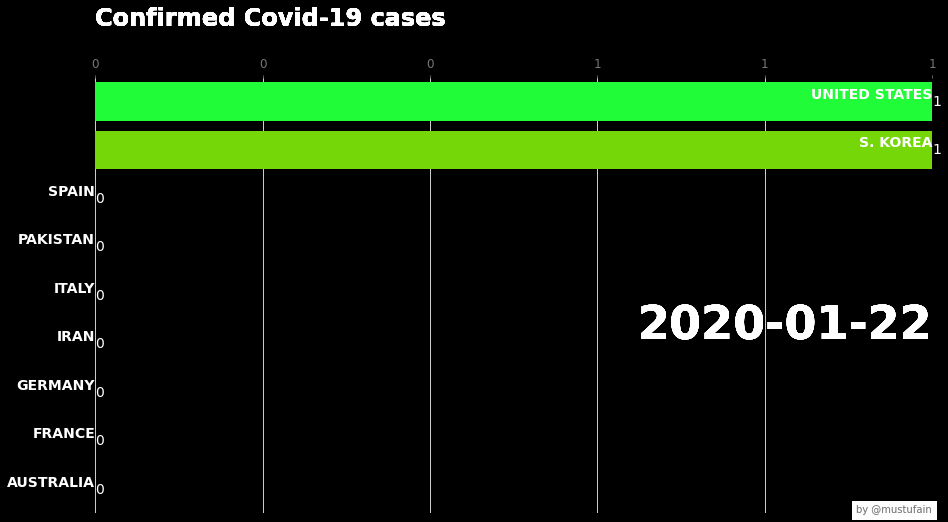

In [6]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
dates = pd.date_range(start='2020-01-22', end=date.today(), freq='D').tolist()   
animator = animation.FuncAnimation(fig, draw_barchart, frames=dates)

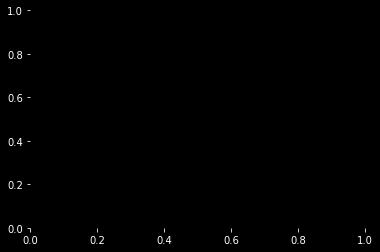

In [7]:
animator.save('covid_19_bar_graph.mp4', fps=2, dpi=80)